In [1]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import time
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df=pd.read_csv('OnlineRetail (1).csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-1-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-1-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-1-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-1-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-1-2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df=df.dropna()

In [6]:
df['CustomerID'] = df['CustomerID'].astype(str)
df['Revenue']=df['UnitPrice']*df['Quantity']
df["InvoiceMonth"] = pd.to_datetime(df["InvoiceDate"]).dt.strftime("%Y-%m")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-1-2010 8:26,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12-1-2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-1-2010 8:26,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-1-2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-1-2010 8:26,3.39,17850.0,United Kingdom,20.34,2010-12


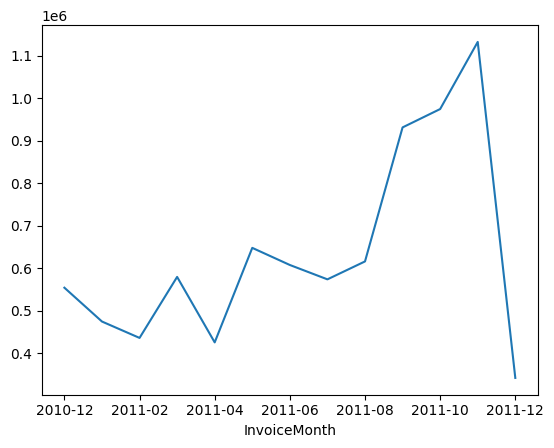

In [7]:
df.groupby('InvoiceMonth')['Revenue'].sum().plot();

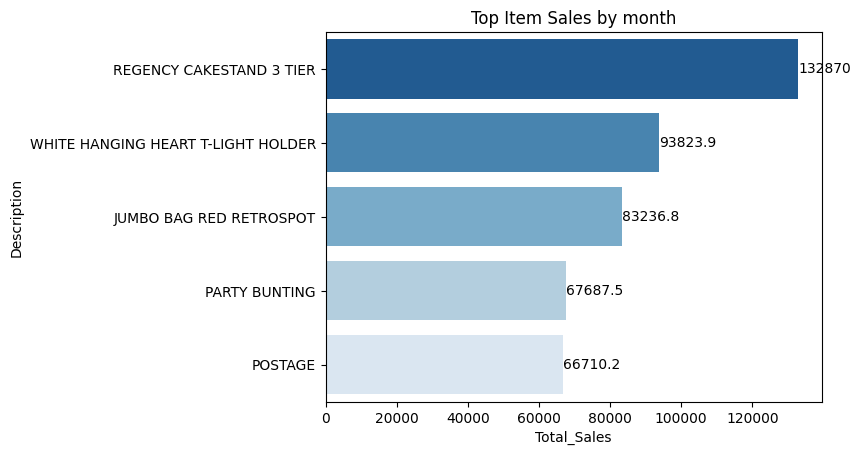

In [8]:
df['Total_Sales'] = df['Quantity']*df['UnitPrice']
total_sales_per_category = df.groupby('Description')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
z = sns.barplot(data=total_sales_per_category.head(5), y='Description',x='Total_Sales',palette = 'Blues_r')
plt.title("Top Item Sales by month")
for i in z.containers:
    z.bar_label(i,)
    #top items saled monthly